## Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

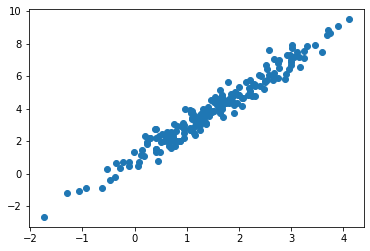

In [2]:
np.random.seed(123)

X = np.random.randn(200) + 1.5 ## Array of 200 values of x with means of 1 (by default) and sd of 1.5
res = 0.5 * np.random.randn(200) ## Generate 200 residuals with sd of 0.6
y = 1 + 2 * X + res

twoDData = np.c_[X,y]

plt.scatter(twoDData[:, 0], twoDData[:, 1])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(twoDData)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.43316568 -0.90131431]
 [-0.90131431  0.43316568]]


In [5]:
print(pca.explained_variance_)

[5.75175781 0.04167795]


In [6]:
pca = PCA(n_components=1)
pca.fit(twoDData)
twoDData_dr = pca.transform(twoDData)
print("original shape:   ", twoDData.shape)
print("transformed shape:", twoDData_dr.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


## PCA for Dimension Reduction

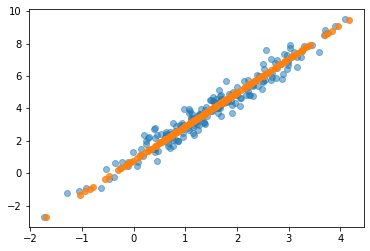

In [7]:
twoDData_new = pca.inverse_transform(twoDData_dr)
plt.scatter(twoDData[:, 0], twoDData[:, 1], alpha=0.5)
plt.scatter(twoDData_new[:, 0], twoDData_new[:, 1], alpha=0.8)

## PCA Example in an Intelligent Tutoring System

In [8]:
ICEdata = pd.read_csv("/Users/yanzhen/Desktop/ICE6_Data.csv")
ICEdata

,id,prior_prob_count,prior_percent_correct,problems_attempted,mean_correct,mean_hint,mean_attempt,mean_confidence
0,172777,650,0.723077,4,1.000000,0.000000,1.000000,0.550159
1,175658,1159,0.800690,22,0.454545,2.227273,1.227273,0.437515
2,175669,1239,0.656981,11,0.636364,1.363636,1.727273,0.511060
3,176151,1246,0.729535,16,0.750000,0.562500,1.187500,0.491578
4,176165,1299,0.568129,6,0.333333,2.166667,2.000000,0.409887
...,...,...,...,...,...,...,...,...
337,253464,9,0.222222,23,0.782609,0.000000,1.347826,0.602103
338,253517,6,0.833333,16,0.562500,0.562500,2.062500,0.571269
339,255494,12,0.750000,3,0.666667,0.666667,1.333333,0.563379
340,256227,84,0.678571,3,0.333333,1.666667,1.333333,0.567501


In [9]:
ICEdata_noid = ICEdata.drop(['id'], axis = 1)
icepca = PCA(n_components=7)
icepca.fit(ICEdata_noid)

print("The principal components are:")
print(icepca.components_)
print("The explained variances are:")
print(icepca.explained_variance_)

The principal components are:
[[ 9.99998379e-01  3.25231653e-05  1.72229676e-03  6.65415156e-05
   4.97054823e-04  1.49367002e-04  1.15030348e-05]
 [-1.73541120e-03  1.03037706e-03  9.99602228e-01  2.30861751e-03
   2.23020180e-02  1.69662730e-02 -8.64582845e-04]
 [-3.87330335e-04 -3.27396081e-02 -2.70451869e-02 -1.24635620e-01
   6.73010236e-01  7.27812593e-01  2.92226368e-03]
 [ 2.29120283e-04  3.26414469e-02  3.68040760e-03  1.78860696e-01
  -7.05688901e-01  6.84765009e-01  5.46329794e-03]
 [ 1.63571033e-04 -1.96336169e-01  6.70115719e-03 -9.52166155e-01
  -2.19898499e-01  3.19977181e-02 -7.35362922e-02]
 [ 1.91456302e-05 -9.79282671e-01  7.60612436e-04  1.99617334e-01
  -2.17110326e-03 -7.96442781e-03  3.30097853e-02]
 [ 1.73255132e-06 -1.78647923e-02 -1.39538358e-03  7.74726598e-02
   1.42375081e-02  3.24800341e-03 -9.96726458e-01]]
The explained variances are:
[1.01909636e+05 9.65917304e+01 8.07223611e-01 4.21069102e-01
 4.13364216e-02 1.60996431e-02 1.08938450e-02]


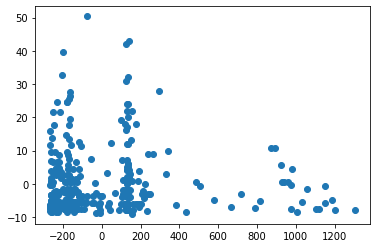

In [10]:
icedata_dr = icepca.transform(ICEdata_noid)
plt.scatter(icedata_dr[:,0], icedata_dr[:,1])

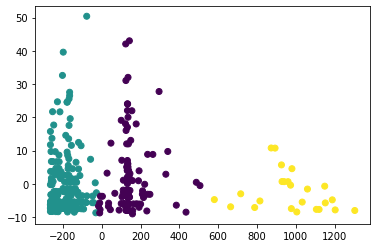

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(icedata_dr)
cluster_kmeans = kmeans.predict(icedata_dr)

plt.scatter(icedata_dr[:, 0], icedata_dr[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters